# William Jardee
## Homework 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializing constants
EPSILON = 8.85e-12  #C^2/N*m^2
K = 1/(4*np.pi*EPSILON)   #C^2/N*m^2

#Initializing Variables (univseral)
Q = 0.2400 #micro Coulumbs
Q = Q *10e-6  #Coulumbs
S = 1.200  #milli Couumbs / meters^2
S = S *10e-3  #Coulumbs /meters^2
V_0 = 0 
D = 1.000e-2 #m
A = 0.273e-2 #m
R = 0.146e-2 #m

In [3]:
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y

In [4]:
#Producing the E Field equation, refer to HW06 for an explanation of the equation
#This was "vectorized" by using the magnitude, l, and the trig identies for cos (for x) and sin (for y)
def E_field(r):
    if (l := np.sqrt((r[0]-A)**2 + r[1]**2)) > R:
        return np.array([-S/EPSILON + (K*Q/(l**2))*(r[0]-A)/l, (K*Q/(l**2)) *(r[1])/l])
    else: 
        return np.array([-S/EPSILON, 0])
    
#This returns the normalized direction of the E Field
#The first input is used, this is the positional argument, the second argument is just to make the rk2d work
def total_E_mag4(r,s):
    field = E_field(r)
    return field / np.sqrt(field[0]**2 + field[1]**2)

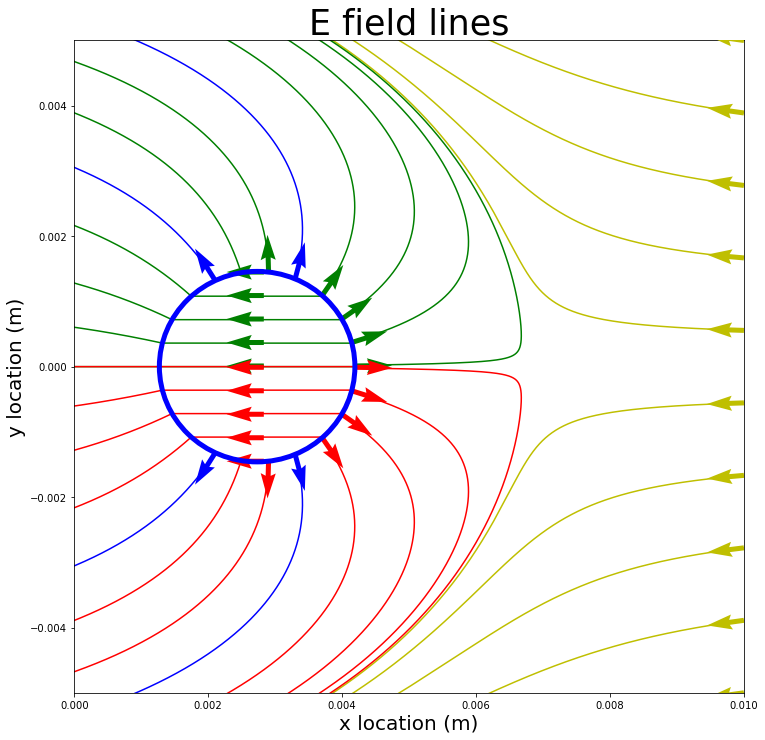

In [5]:
#Create the plots
fig, ax1 = plt.subplots(figsize = (12,12))

"""
The general idea is that we will create line at a regular interval and they will naturally show the higher density, as
they will group together as it gets more dense. If it wasn't so late on a Saturday night I would compact this into
a couple pretty functions, but I want to go to sleep. The lines have been left color coordinated to help with debugging
and understanding the flow of code. Idealy I would have worked to place the quiver function to a more organic location,
but the vital information of direction of flow is shared with the current setup.
"""


#Right plate
for y in np.linspace(-D/2,D/2, 10):
    s, r = rk2([D,y], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="y")
    plt.quiver(D,y, -r[:,0][0]+r[:,0][1], -r[:,1][0]+r[:,1][1], zorder=10, color='y')

#Top of sphere
for y in np.linspace(D/1000, R-D/1000, 5):
    s, r = rk2([A+np.sqrt(R**2-(y)**2),y-D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="g") 
    plt.quiver(A+D/100,y, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder=10, color='g')
    
    s, r = rk2([A+np.sqrt(R**2-(y)**2),y+D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="g") 
    plt.quiver(A+np.sqrt(R**2-(y)**2),y, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder=10, color='g')
        
    
#Bottom of sphere
for y in np.linspace(-R+D/1000, -D/1000, 5):
    s, r = rk2([A+np.sqrt(R**2-(y)**2),y-D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="r") 
    plt.quiver(A+np.sqrt(R**2-(y)**2),y, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder=10, color='r')
    
    s, r = rk2([A+np.sqrt(R**2-(y)**2),y+D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="r") 
    plt.quiver(A+D/100,y, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder=10, color='r')
    
#Filling in empty space
for x in [0.0033, 0.0021]:
    s, r = rk2([x, np.sqrt(R**2-(A-x)**2)+D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="b") 
    plt.quiver(x, np.sqrt(R**2-(A-x)**2)+D/1000, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder=10, color='b')
    
    s, r = rk2([x, -np.sqrt(R**2-(A-x)**2)-D/1000], 0, 1e-2, 5e-6, total_E_mag4)
    plt.plot(r[:,0], r[:,1], color="b") 
    plt.quiver(x, -np.sqrt(R**2-(A-x)**2)-D/1000, -r[:,0][5]+r[:,0][6], -r[:,1][5]+r[:,1][6], zorder = 10, color='b')
    
#Drawing sphere
circle2 = plt.Circle((A, 0), R, color='b', fill=False, linewidth=5, zorder=10)
ax1.add_artist(circle2)

plt.xlim(0,D)
plt.ylim(-D/2, D/2)
plt.ylabel("y location (m)", size=20)
plt.xlabel("x location (m)", size=20)
plt.title("E field lines", size=35)
plt.show()